In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [2]:
df=pd.read_csv("bodyPerformance.csv")
display(df)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:

def description (data: pd.DataFrame):
    print(f"Shape: \n{data.shape}\n")
    print(f"Dimension: \n{data.ndim}\n")
    print(f"Data types: \n{data.dtypes}\n")
    print(f"Data information: \n{data.info()}\n")
    print(f"Data description: \n{data.describe()}\n")
    print(f"Total de valores nulos: \n{data.isnull().sum()}\n")
    print(f"Total de valores duplicados: \n{data.duplicated().sum()}\n")

description(df)

Shape: 
(13393, 12)

Dimension: 
2

Data types: 
age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic               

In [4]:
df2=df.copy()

In [5]:
#Eliminar valor duplicado:

#Creo una variable que me indique si hay valores duplicados:
duplicados = df2.duplicated()
#Muestro los valores duplicados:
fila_duplicada = df2[duplicados]
print("Fila duplicada:")
print(fila_duplicada)
#Elimino los valores duplicados:
df2.drop_duplicates(inplace=True)
#Verifico que se hayan eliminado los valores duplicados:
print(f"Total de valores duplicados: \n{df2.duplicated().sum()}\n")

Fila duplicada:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12473  27.0      F      157.0       49.1        30.7       70.0      86.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
12473       27.7                     19.7            51.0          167.0     A  
Total de valores duplicados: 
0



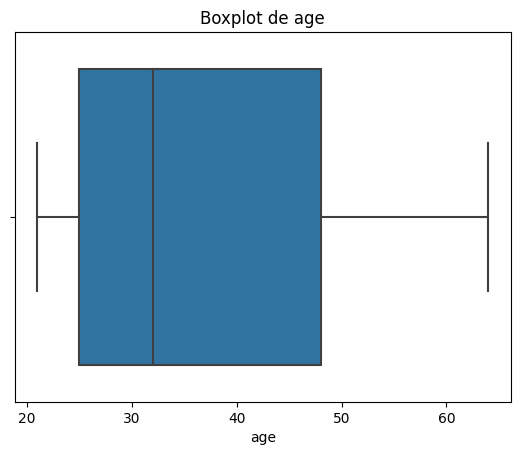

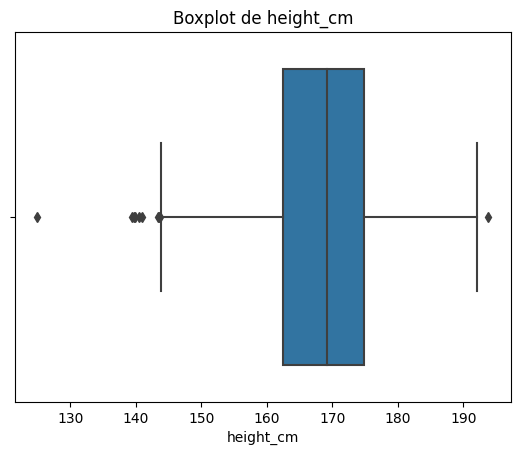

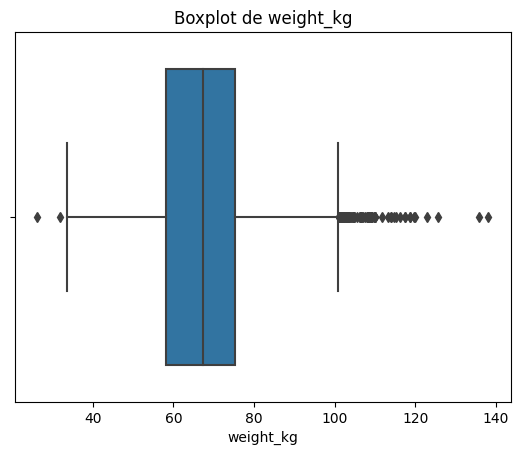

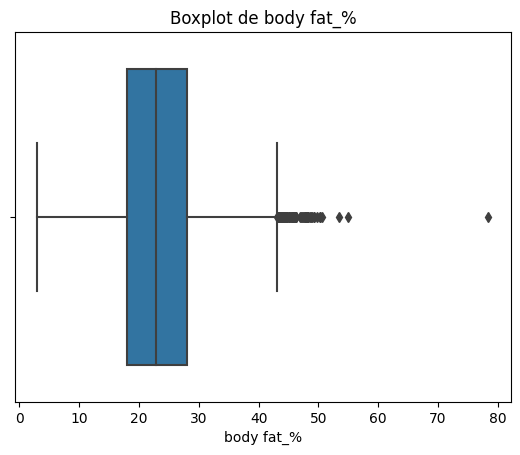

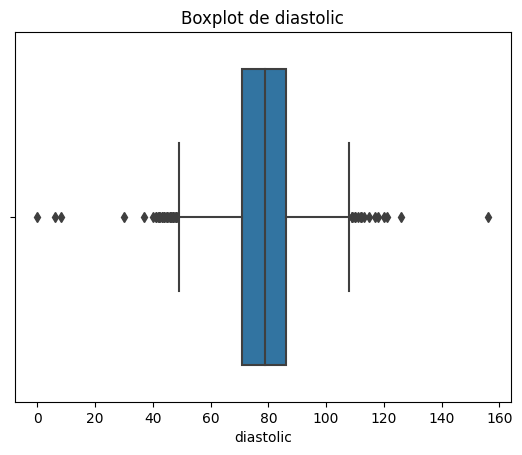

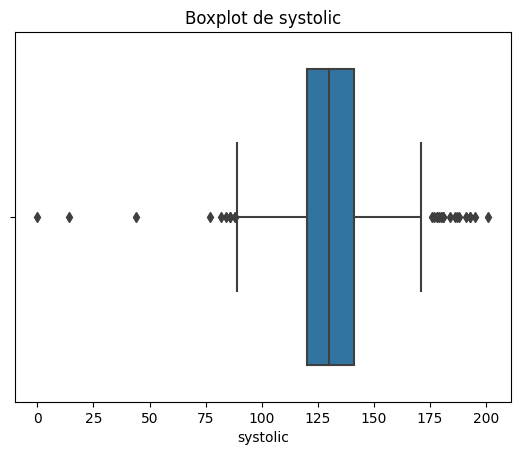

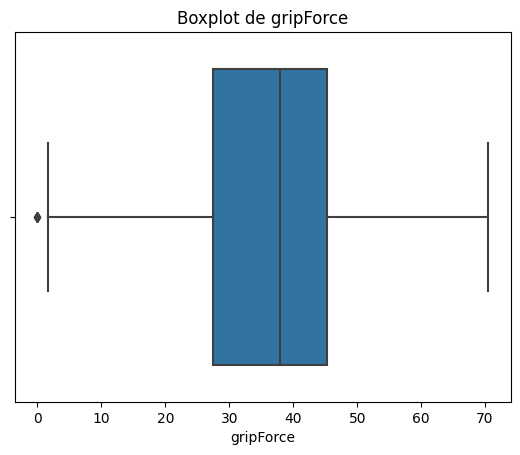

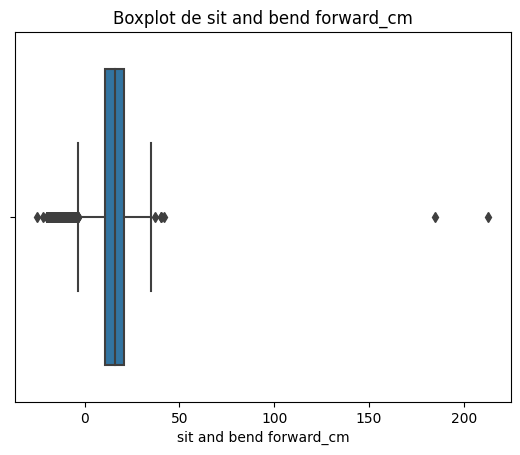

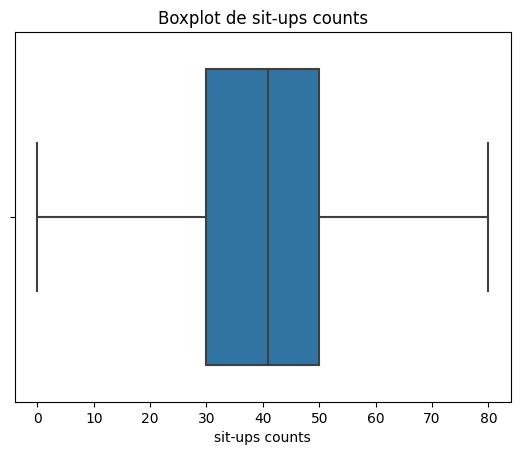

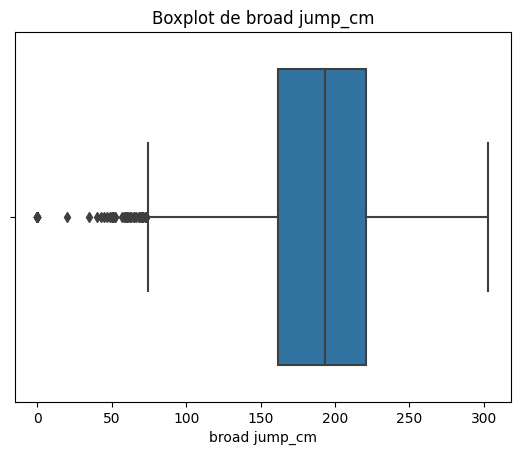

Registros con outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
58     42.0      M      174.1     103.10    30.50000       78.0     123.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
136    61.0      F      153.2      62.20    37.00000       71.0     111.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups 

In [6]:
# Identificación de outliers:

numericas = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for column in numericas:
    sns.boxplot(x=df2[column])
    plt.title("Boxplot de " + column)
    plt.xlabel(column)
    plt.show()

#rango entre cuartiles
Q1 = df[numericas].quantile(0.25)
Q3 = df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Identificar los outliers
outliers = ((df2[numericas] < (Q1 - 1.5 * IQR)) | (df[numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

# Mostrar los registros que contienen outliers
outlier_rows = df[outliers]
print("Registros con outliers:")
print(outlier_rows)

In [7]:
# Eliminar las filas que contienen outliers
df2 = df2[~outliers]

# Mostrar el DataFrame limpio
print("DataFrame sin outliers:")
print(df2)

DataFrame sin outliers:
        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups 

C:\Users\usuario\AppData\Local\Temp\ipykernel_10500\3733752305.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[~outliers]


In [8]:
# Conversión cm a m.
#Conversion y renombrado de la altura (height_cm):
df2["alto_m"] = df2["height_cm"]/100
#Conversion y renombrado de columna Sentarse e inclinarse hacia adelante (sit and bend forward_cm):
df2["sentarse_inclinarse_m"] = df2["sit and bend forward_cm"]/100
#Conversion y renombrado de columna salto en largo (broad jump_cm):
df2["salto_largo_m_"] = df2["broad jump_cm"]/100

#Eliminar columnas en cm.
df2.drop(["height_cm","sit and bend forward_cm","broad jump_cm"], axis=1, inplace=True)

# Calcula el IMC:
df2['IMC'] = df2['weight_kg'] / (df2['alto_m'] ** 2)

#Renombrar las columnas:
df2.rename(columns={"age": "edad", "gender": "genero","height_cm":"alto_m", "weight_kg": "peso_kg","body fat_%": "grasa_corporal_%","diastolic": "diastolica","systolic": "sistolica","gripForce": "fuerza_agarre",
"sit-ups counts": "cant_abdominales","class": "clase"}, inplace=True)

df.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [9]:
#Binarizado de la columna genero: Utilizamos get_dummies para crear una columna por cada valor de la columna genero. 
#(La columna genero se elimina y se crea genero_M donde M:1 / F:0)

df2 = pd.get_dummies(df2, columns=['genero'], drop_first=True)
# renombramos la columna genero_M a genero:
df2.rename(columns={"genero_M":'genero'},inplace=True)
conteo_genero = df2['genero'].value_counts()

# Mostrar los conteos de las columnas genero y clase:
print('Cantidad de 0 y 1 en la columna género:')
print(conteo_genero)

Cantidad de 0 y 1 en la columna género:
1    8002
0    4723
Name: genero, dtype: int64


In [10]:
# Verifico nulos en 'genero' y 'clase' en df
print('Nulos en genero en df:', df2['genero'].isnull().sum())
print('Nulos en clase en df:', df2['clase'].isnull().sum())

Nulos en genero en df: 0
Nulos en clase en df: 0


In [11]:
# Asignamos valores numéricos a las clases: Usamos la función labelEncoder para mapear los valores categóricos de "clase" a valores numericos.

# Mapeo de valores de la columna clase:
# A:0,
# B:1,
# C:2,
# D:3

encode =LabelEncoder()
df2["clase_encode"] = encode.fit_transform(df2["clase"])
# Eliminamos la columna clase:
df2.drop(["clase"], axis=1, inplace=True)
# renombramos la columna clase_encode a clase:
df2.rename(columns={"clase_encode":'clase'},inplace=True)
conteo_clase = df2['clase'].value_counts()
print('Cantidad de 0,1,2,3 en la columna clase:')
print(conteo_clase)

Cantidad de 0,1,2,3 en la columna clase:
2    3324
0    3320
1    3315
3    2766
Name: clase, dtype: int64


In [12]:
#Reordenamos:
ordenado =[
'edad',
'genero',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
'clase',
]
df2 = df2[ordenado]


In [13]:
# Selecciono las columnas con valores numéricos continuos:
columnas_a_escalar = [
'edad',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
]

# Creo un nuevo dataframe con las columnas a escalar:
df_columnas_escalar = df2[columnas_a_escalar]

# Instancio el objeto StandardScaler:
scaler = StandardScaler()

# Escalo las columnas seleccionadas
df_scaled_values = scaler.fit_transform(df_columnas_escalar)

# Crear un nuevo DataFrame escalado
df_scaled = pd.DataFrame(df_scaled_values, columns=columnas_a_escalar)

In [14]:
# Verifico nulos en 'genero' y 'clase' en df2
print('Nulos en genero en df2:', df2['genero'].isnull().sum())
print('Nulos en clase en df2:', df2['clase'].isnull().sum())

# Agregar 'genero' y 'clase' a df_scaled
df_scaled['genero'] = df2['genero']
df_scaled['clase'] = df2['clase']

Nulos en genero en df2: 0
Nulos en clase en df2: 0


In [15]:
#Encontramos nulos al revisar luego de hacer el Standard Scale.
# Verificar y eliminar filas con nulos en 'genero' y 'clase'
df_scaled.dropna(subset=['genero', 'clase'], inplace=True)

In [16]:
#Reordenamos:
ordenado =[
'edad',
'genero',
'alto_m', 
'peso_kg', 
'grasa_corporal_%',
'IMC',
'diastolica', 
'sistolica', 
'fuerza_agarre', 
'sentarse_inclinarse_m',
'cant_abdominales', 
'salto_largo_m_',
'clase',
]
df_scaled = df_scaled[ordenado]

#Mostrar dataset escalado:
df_scaled.head(10)

,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase
0,-0.712860,1.0,0.456915,0.720913,-0.235718,0.680745,0.117028,-0.013245,1.686539,0.345164,1.409117,0.661295,2.0
1,-0.860171,1.0,-0.423587,-0.983159,-1.036300,-1.082309,-0.170786,-0.291824,-0.062659,0.044379,0.907702,0.971405,0.0
2,-0.418237,1.0,1.337416,0.962849,-0.407271,0.257919,1.268281,1.518940,0.731571,-0.571514,0.621179,-0.269034,2.0
3,-0.344581,1.0,0.722272,0.358009,-0.650305,-0.044583,-0.266724,1.170716,0.410097,-0.113175,0.907702,0.712980,1.0
4,-0.639204,1.0,0.637840,0.059971,-0.836154,-0.385361,-0.842350,-0.222179,0.608655,1.591273,0.334656,0.661295,1.0
5,-0.049959,0.0,-0.375340,-1.018222,-0.135645,-1.171484,-1.417977,-0.779337,-1.254004,0.717564,-0.954698,-0.992624,1.0
6,0.391976,0.0,-0.483895,-0.290661,1.322557,0.024691,-0.650475,0.334979,-1.358010,-2.175701,-1.599375,-1.173521,3.0
7,-0.270926,1.0,0.770518,0.892723,1.994474,0.641769,0.500779,0.474269,0.835578,-0.528545,0.119763,1.100618,1.0
8,1.275844,1.0,-0.206477,0.042440,0.664936,0.286915,0.596716,2.424322,0.315546,0.373810,-0.453283,-1.121836,2.0
9,-0.639204,1.0,1.988746,1.541392,-1.222149,0.453320,0.212965,1.797519,1.970192,-0.557191,1.050963,0.557925,1.0


In [17]:
target = 'clase'

 Division del df en un df para entrenamiento y prueba
 

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.1, random_state=99,
                                stratify=df2[target])
print(train.shape, test.shape)

(11452, 13) (1273, 13)


PyCaret’s Classification Module

Documentacion aqui: https://pycaret.gitbook.io/docs/get-started/installation LEEME

In [19]:
#Variacion de instalacion para instalar mas paquetes, --user por problemas con permisos en la pc. En kraggle, hay otras versiones. Esta me funciono a mi.
#La primera instalacion puede demorar varios minutos y hasta requerir que reinicie el sistema. Paciencia.
%pip install pycaret[full] --user 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from pycaret.classification import *

In [21]:
exp_clf = setup(train, target = 'clase',session_id=1)

,Description,Value
0,Session id,1
1,Target,clase
2,Target type,Multiclass
3,Original data shape,"(11452, 13)"
4,Transformed data shape,"(11452, 13)"
5,Transformed train set shape,"(8016, 13)"
6,Transformed test set shape,"(3436, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [22]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7400,0.9148,0.7400,0.7462,0.7399,0.6521,0.6540,1.0930
xgboost,Extreme Gradient Boosting,0.7313,0.9111,0.7313,0.7371,0.7314,0.6404,0.6420,3.8740
catboost,CatBoost Classifier,0.7196,0.9078,0.7196,0.7247,0.7196,0.6247,0.6261,14.5120
gbc,Gradient Boosting Classifier,0.7092,0.8998,0.7092,0.7161,0.7085,0.6108,0.6133,6.6800
et,Extra Trees Classifier,0.7063,0.8929,0.7063,0.7100,0.7046,0.6071,0.6093,0.9910
rf,Random Forest Classifier,0.7056,0.8994,0.7056,0.7085,0.7045,0.6061,0.6076,1.8770
qda,Quadratic Discriminant Analysis,0.6465,0.8620,0.6465,0.6502,0.6468,0.5269,0.5276,0.0510
dt,Decision Tree Classifier,0.6184,0.7439,0.6184,0.6194,0.6185,0.4902,0.4904,0.1110
lda,Linear Discriminant Analysis,0.5992,0.8391,0.5992,0.5998,0.5986,0.4640,0.4645,0.0920
ada,Ada Boost Classifier,0.5771,0.7319,0.5771,0.5897,0.5775,0.4329,0.4351,0.4780


In [23]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


Analizamos el rendimiento del modelo.

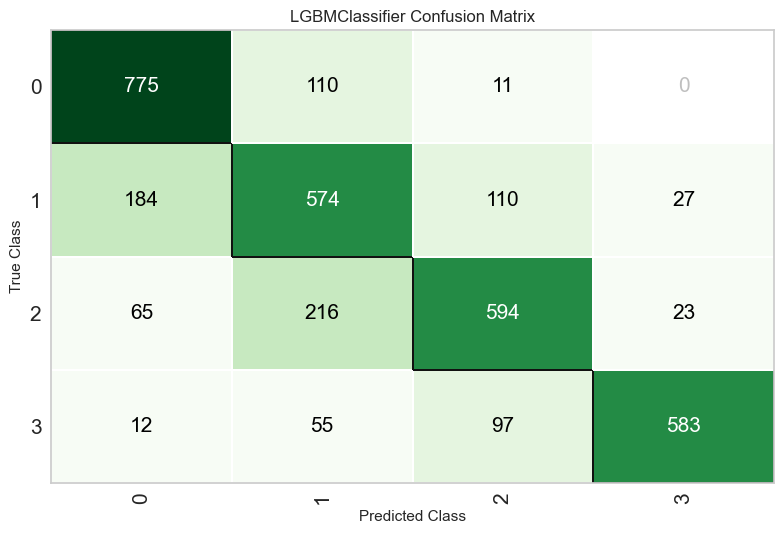

In [24]:
#Matriz de confucion.
plot_model(best, plot="confusion_matrix")

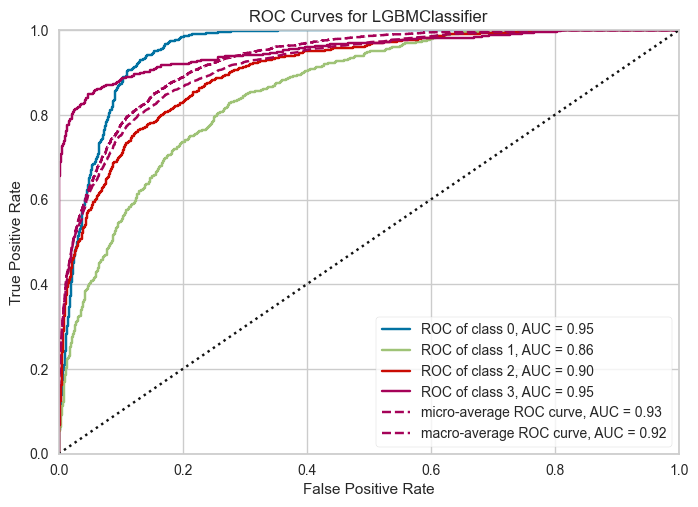

In [25]:
#Area bajo la curva
plot_model(best, plot = 'auc')


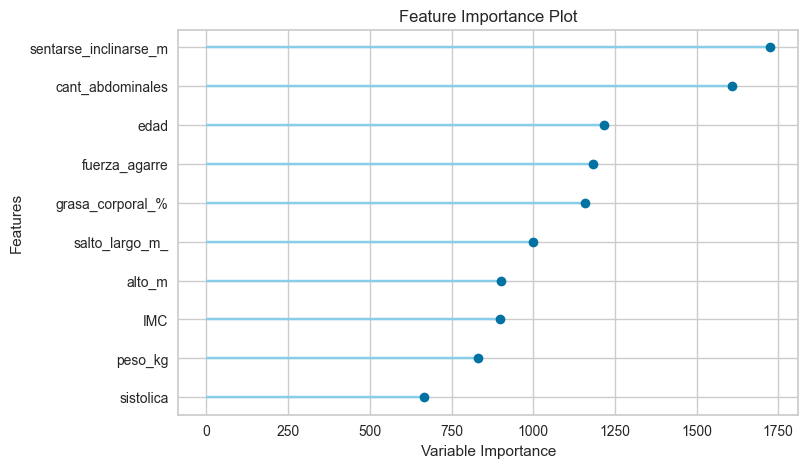

In [26]:
#Importancia de funciones
plot_model(best, plot = 'feature')

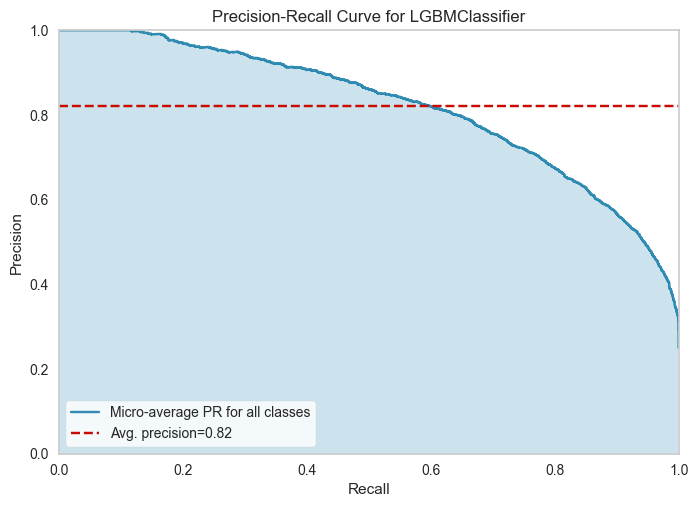

In [27]:
#Curva de recuperacion precisiva
plot_model(best, plot=("pr"))

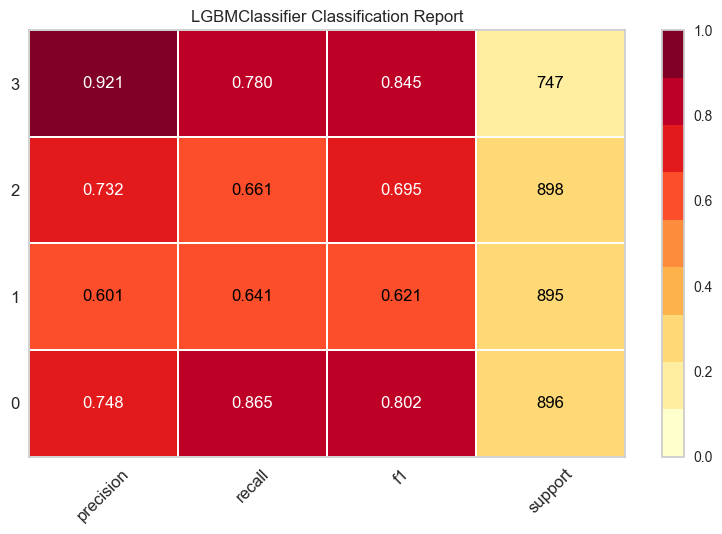

In [28]:
#Informe de clasificacion
plot_model(best, plot=("class_report"))

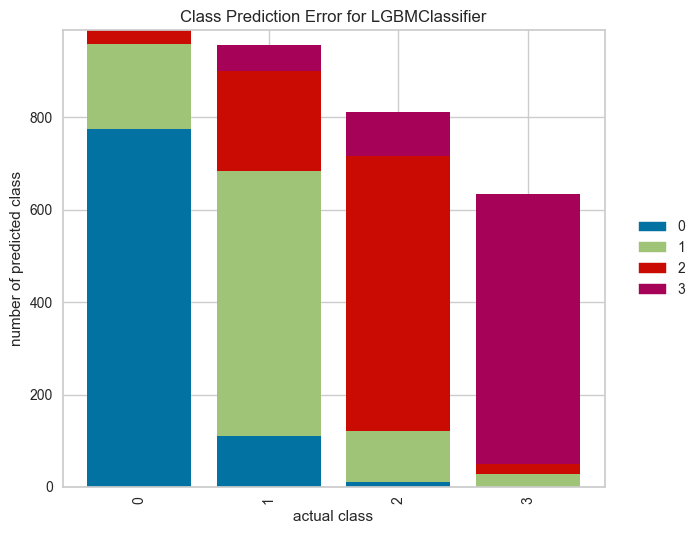

In [29]:
#Error de prediccion de clase
plot_model(best, plot=("error"))

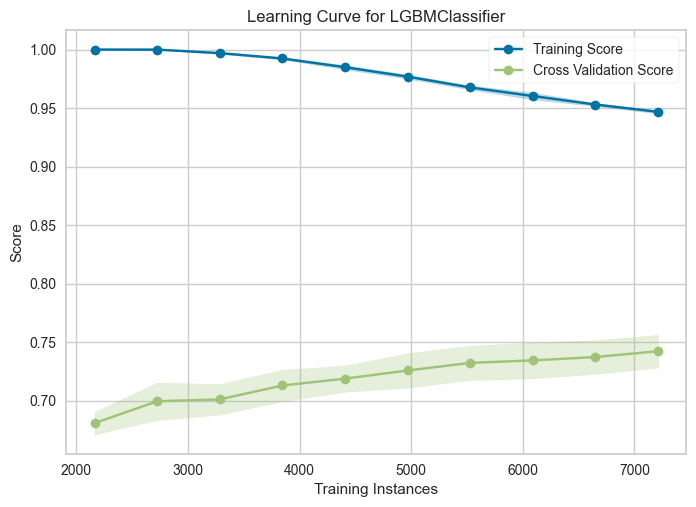

In [30]:
#Curva de aprendizaje
plot_model(best, plot=("learning"))

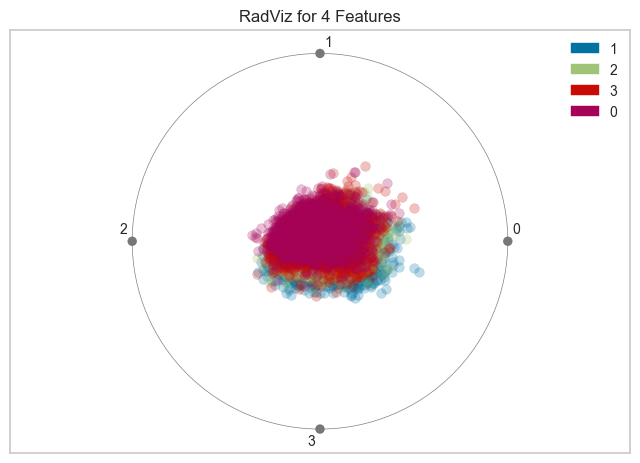

In [31]:
#Aprendzaje de Dimenisones
plot_model(best, plot=("dimension"))

In [32]:
#Hiperparametros del modelo
plot_model(best, plot=("parameter"))


,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


Predicciones

In [33]:
predictions = predict_model(best, data=df2)
predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8620,0.9680,0.8620,0.8661,0.8622,0.8155,0.8167


,edad,genero,alto_m,peso_kg,grasa_corporal_%,IMC,diastolica,sistolica,fuerza_agarre,sentarse_inclinarse_m,cant_abdominales,salto_largo_m_,clase,prediction_label,prediction_score
0,27.0,1,1.723,75.239998,21.299999,25.344179,80.0,130.0,54.900002,0.184,60.0,2.17,2,0,0.6078
1,25.0,1,1.650,55.799999,15.700000,20.495869,77.0,126.0,36.400002,0.163,53.0,2.29,0,0,0.8487
2,31.0,1,1.796,78.000000,20.100000,24.181427,92.0,152.0,44.799999,0.120,49.0,1.81,2,2,0.5294
3,32.0,1,1.745,71.099998,18.400000,23.349562,76.0,147.0,41.400002,0.152,53.0,2.19,1,1,0.6371
4,28.0,1,1.738,67.699997,17.100000,22.412439,70.0,127.0,43.500000,0.271,45.0,2.17,1,1,0.6718
5,36.0,0,1.654,55.400002,22.000000,20.250641,64.0,119.0,23.799999,0.210,27.0,1.53,1,1,0.7286
6,42.0,0,1.645,63.700001,32.200001,23.540064,72.0,135.0,22.700001,0.008,18.0,1.46,3,3,0.9998
7,33.0,1,1.749,77.199997,36.900002,25.236998,84.0,137.0,45.900002,0.123,42.0,2.34,1,1,0.7598
8,54.0,1,1.668,67.500000,27.600000,24.261168,85.0,165.0,40.400002,0.186,34.0,1.48,2,2,0.4875
9,28.0,1,1.850,84.599998,14.400000,24.718773,81.0,156.0,57.900002,0.121,55.0,2.13,1,1,0.8535


Guardar el modelo

In [34]:
save_model(best, 'model_lgtm_bodyPerformance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'genero', 'alto_m',
                                              'peso_kg', 'grasa_corporal_%',
                                              'IMC', 'diastolica', 'sistolica',
                                              'fuerza_agarre',
                                              'sentarse_inclinarse_m',
                                              'cant_abdominales',
                                              'salto_largo_m_'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                  LGBMClassifier(boosting_type='gbdt', class

In [35]:
# Para volver a cargar el modelo en un entorno
#loaded_model = load_model('model_lgtm_bodyPerformance')
#print(loaded_model)

Prueba con Regresion Logistica. 
Prueba automatizada para ver los resultados para comparar con lo creado en el main

In [36]:
Rgr=create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5362,0.7886,0.5362,0.5316,0.5328,0.3798,0.3804
1,0.5474,0.8003,0.5474,0.5433,0.5445,0.3951,0.3955
2,0.5773,0.8062,0.5773,0.5645,0.5663,0.4355,0.4382
3,0.5574,0.8141,0.5574,0.5456,0.5497,0.4089,0.4100
4,0.5499,0.8039,0.5499,0.5451,0.5471,0.3989,0.3991
5,0.5561,0.8051,0.5561,0.5541,0.5534,0.4061,0.4069
6,0.5368,0.7989,0.5368,0.5230,0.5271,0.3817,0.3833
7,0.5443,0.7994,0.5443,0.5343,0.5376,0.3910,0.3921
8,0.5531,0.7956,0.5531,0.5424,0.5460,0.4036,0.4045


In [37]:
tuned_lr = tune_model(Rgr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5486,0.7923,0.5486,0.5406,0.5423,0.3967,0.3979
1,0.5399,0.8011,0.5399,0.5366,0.5376,0.3852,0.3855
2,0.5823,0.8179,0.5823,0.5740,0.5754,0.4421,0.4436
3,0.5636,0.8096,0.5636,0.5560,0.5583,0.4169,0.4178
4,0.5436,0.8022,0.5436,0.5313,0.5351,0.3910,0.3922
5,0.5561,0.8044,0.5561,0.5504,0.5514,0.4064,0.4074
6,0.5406,0.7985,0.5406,0.5255,0.5300,0.3872,0.3889
7,0.5718,0.8151,0.5718,0.5644,0.5666,0.4279,0.4288
8,0.5543,0.7974,0.5543,0.5424,0.5463,0.4053,0.4063


Fitting 10 folds for each of 10 candidates, totalling 100 fits


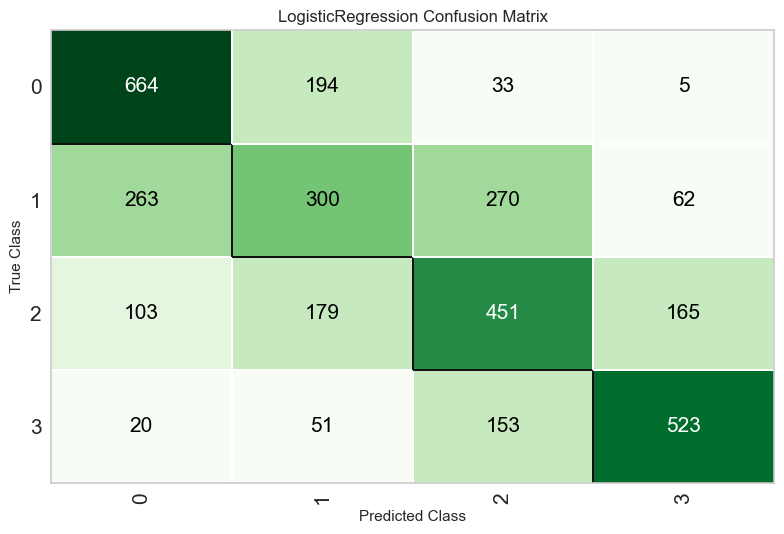

In [38]:
plot_model(Rgr, plot = 'confusion_matrix')

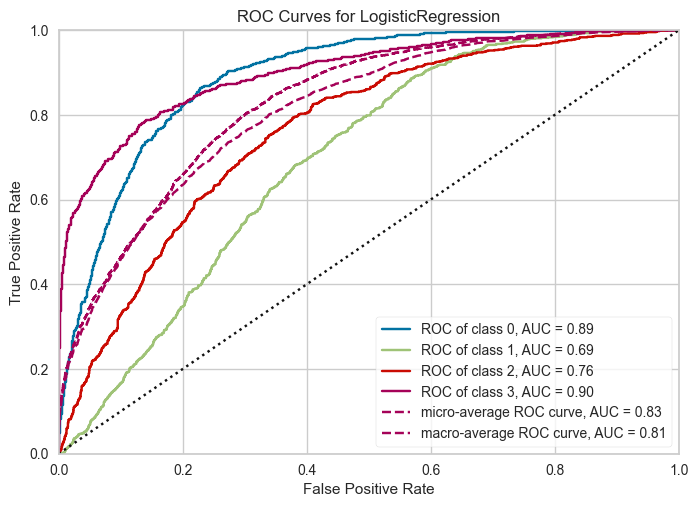

In [39]:
plot_model(Rgr, plot = 'auc')

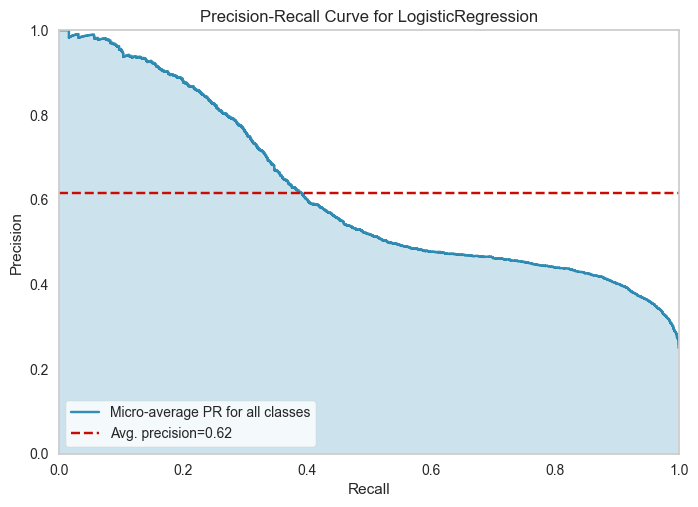

In [40]:
plot_model(Rgr, plot = "pr")

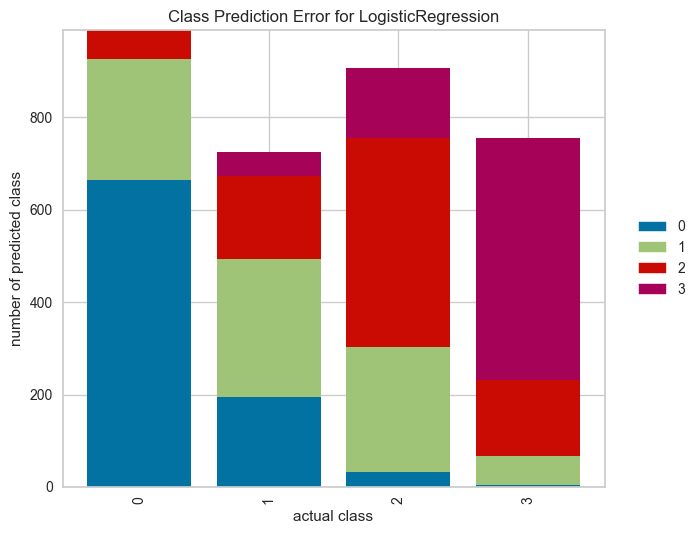

In [43]:
plot_model(Rgr, plot = 'error')

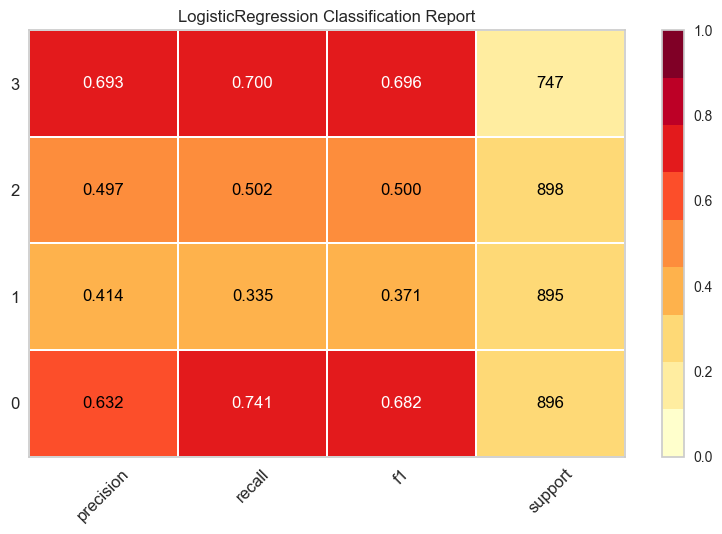

In [44]:
plot_model(Rgr, plot = 'class_report')

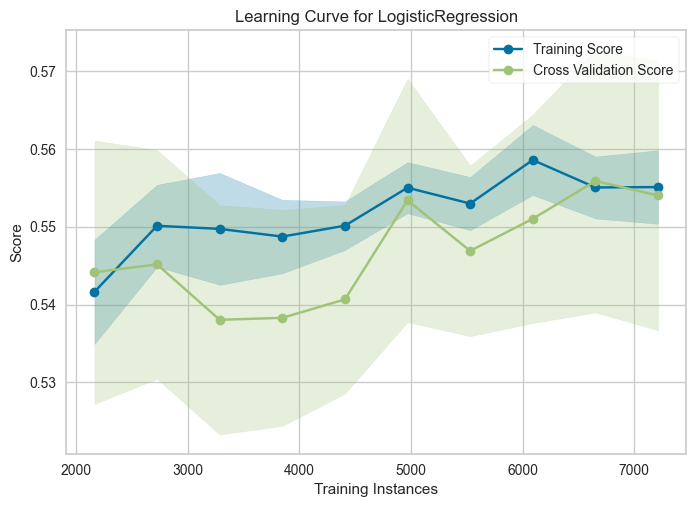

In [45]:
plot_model(Rgr, plot = 'learning')

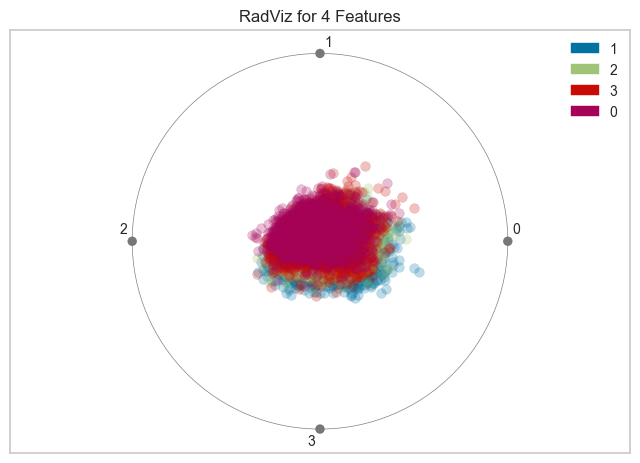

In [46]:
plot_model(Rgr, plot = 'dimension')


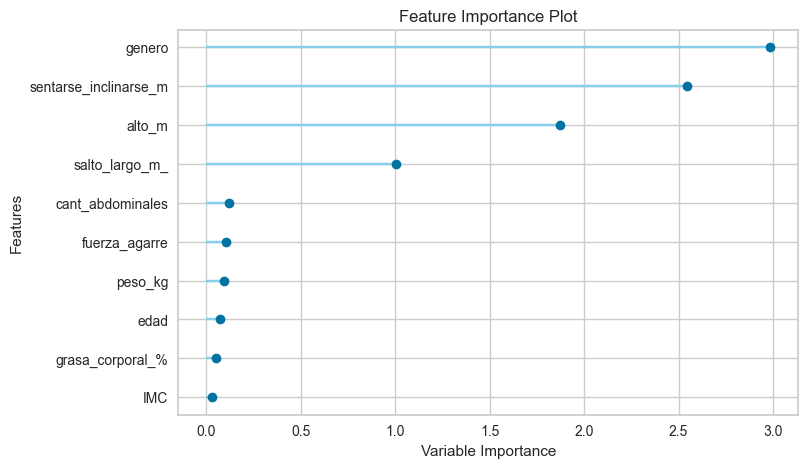

In [47]:
plot_model(Rgr, plot = 'feature')

In [48]:
plot_model(Rgr, plot = 'parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [50]:
save_model(Rgr, 'model_LRdePycaret_bodyPerformance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'genero', 'alto_m',
                                              'peso_kg', 'grasa_corporal_%',
                                              'IMC', 'diastolica', 'sistolica',
                                              'fuerza_agarre',
                                              'sentarse_inclinarse_m',
                                              'cant_abdominales',
                                              'salto_largo_m_'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                  TransformerWrapper(exclude=None, include=N